<h1>Implementing Simple Linear Regression From Scratch With Python</h1>

<p>In this tutorial, you will discover how to implement the simple linear regression algorithm from scratch in Python.</p><p>After completing this tutorial you will know:</p><ul>
<li>How to estimate statistical quantities from training data.</li>
<li>How to estimate linear regression coefficients from data.</li>
<li>How to make predictions using linear regression for new data.</li>
</ul><h3>Simple Linear Regression</h3><p>Linear regression assumes a linear or straight line relationship between the input variables (X) and the single output variable (y).</p><p>More specifically, that output (y) can be calculated from a linear combination of the input variables (X). When there is a single input variable, the method is referred to as a simple linear regression.</p><p>In simple linear regression we can use statistics on the training data to estimate the coefficients required by the model to make predictions on new data.</p><p>The line for a simple linear regression model can be written as:</p><p>y = b0 + b1 * x</p><p>where b0 and b1 are the coefficients we must estimate from the training data.</p>

<p>Once the coefficients are known, we can use this equation to estimate output values for y given new input examples of x.</p><p>It requires that you calculate statistical properties from the data such as mean, variance and covariance.</p>

<p>All the algebra has been taken care of and we are left with some arithmetic to implement to estimate the simple linear regression coefficients.</p><p>Briefly, we can estimate the coefficients as follows:</p><p></p><p>$$ B_1 = \frac{\sum_{i} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i} (x_i - \bar{x})^2} $$</p><p></p>$$ B_0 = \bar{y} - B_1 \times \bar{x} $$</p><p>where the i refers to the value of the ith value of the input x or output y.</p>

<h3>Swedish Insurance Dataset</h3><p>We will use a real dataset to demonstrate simple linear regression.</p><p>The dataset is called the “Auto Insurance in Sweden” dataset and involves predicting the total payment for all the claims in thousands of Swedish Kronor (y) given the total number of claims (x).</p><p>This means that for a new number of claims (x) we will be able to predict the total payment of claims (y).</p><p>Here is a small sample of the first 5 records of the dataset.</p>

In [ ]:
import pandas as pd
import matplotlib
df = pd.read_csv('insurance.csv', header=None)
df.head()

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       63 non-null     int64  
 1   1       63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


### Zero Rule Algorithm
The Zero Rule Algorithm, often referred to as the ZeroR algorithm, is one of the simplest classification algorithms in machine learning. It serves as a basic baseline method to compare with other, more complex algorithms. Its name derives from the fact that it involves zero rules for predicting.

Here's how it works for different types of problems:

1. **Classification**: 
    - For a classification problem, the Zero Rule Algorithm predicts the class that is most frequent in the training dataset. In other words, if you're trying to classify emails into "spam" or "not spam", and 80% of your training set is "not spam", the ZeroR algorithm will classify all emails as "not spam".

2. **Regression**:
    - For a regression problem, the Zero Rule Algorithm predicts the mean (or median, depending on the preference or specific use-case) output value in the training dataset.

The Zero Rule Algorithm provides a naive baseline, and any sophisticated algorithm should ideally perform better than this baseline. If not, there might be issues with that particular algorithm or with the dataset's preprocessing and handling.

While the ZeroR algorithm might sound overly simplistic, it's particularly useful in scenarios where the dataset is highly imbalanced. Knowing the naive baseline helps in gauging how well an advanced algorithm performs relative to a simple guess.

### RMSE
RMSE stands for Root Mean Square Error. It's a frequently used metric to evaluate the differences between values predicted by a model or an estimator and the values actually observed. It provides a measure of the overall error between predicted and observed values for a given dataset.

Mathematically, RMSE is defined as:

$$ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $$

Where:
- \( n \) is the number of observations.
- \( y_i \) is the actual value for the i-th observation.
<p>$$ \hat{y}_i $$ is the predicted value for the i-th observation.</p>

Key points about RMSE:

1. **Scale**: RMSE is in the same unit as the quantity being estimated. For example, if you're predicting house prices (in thousands of dollars), then the RMSE would also be in thousands of dollars.

2. **Magnitude**: A lower RMSE indicates a better fit of the model to the data, as it signifies that the model's predictions are close to the observed values. However, the "goodness" of the RMSE value depends on the context and the domain. An RMSE of $10,000 might be acceptable when predicting house prices, but not when predicting the price of a book.

3. **Sensitivity**: RMSE gives a relatively high weight to large errors because the differences are squared before they are averaged. This means that RMSE is more sensitive to occasional large errors than Mean Absolute Error (MAE).

4. **Comparison**: RMSE is useful when comparing different models on the same dataset. A model with a lower RMSE is generally considered better, as long as the comparison is being done on the same dataset.

In many applications, particularly in regression problems, RMSE serves as a key metric to evaluate model performance and guide the tuning of model hyperparameters.

<p>Using the Zero Rule algorithm (that predicts the mean value) a Root Mean Squared Error or RMSE of about 81 (thousands of Kronor) is expected.</p><p>Below is a scatter plot of the entire dataset.</p>

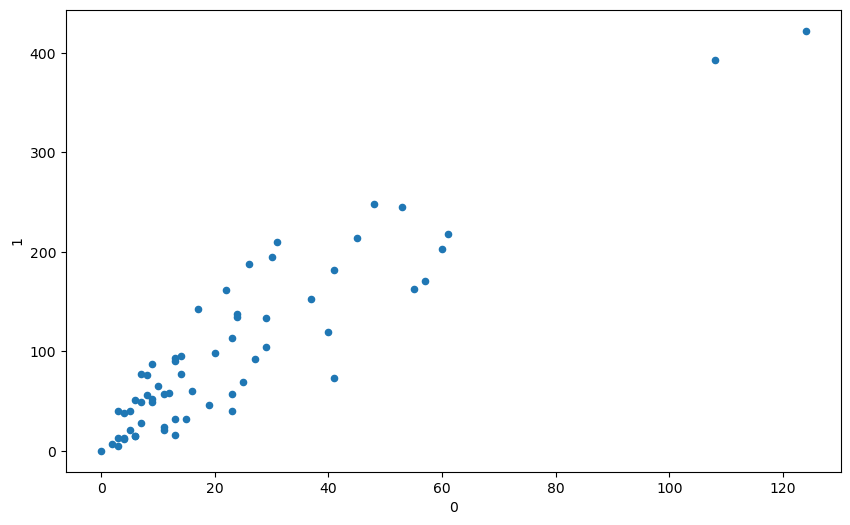

In [4]:
plt = df.plot.scatter(x = 0, y= 1, figsize=(10, 6))

<h2>Notebook</h2><p>This notebook is broken down into five parts:</p><ol>
<li>Calculate Mean and Variance.</li>
<li>Calculate Covariance.</li>
<li>Estimate Coefficients.</li>
<li>Make Predictions.</li>
<li>Predict Insurance.</li>
</ol><p>These steps will give you the foundation you need to implement and train simple linear regression models for your own prediction problems.</p><h3>1. Calculate Mean and Variance</h3><p>The first step is to estimate the mean and the variance of both the input and output variables from the training data.</p><p>The <strong>mean</strong> of a list of numbers can be calculated as:</p><p></p>$$ \text{Mean} (\bar{X}) = \frac{1}{n} \sum_{i=1}^{n} x_i $$</p>

Where:

- $$ n $$ is the number of observations or data points.
- $$ x_i $$ represents each individual data point in the set.

<p>Below is a function named <strong>mean()</strong> that implements this behavior for a list of numbers.</p>

In [5]:
# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))

<p>Variance is a statistical measure that describes the spread or dispersion of a set of data points. In other words, it quantifies how much each data point in a given dataset varies from the mean (average) of the dataset.</p><p><strong>Variance</strong> for a list of numbers can be calculated as:</p><p></p><p>$$\text{variance}(\sigma^2) = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2 $$</p>
where:

- $$ N $$ : is the number of observations in the population.
- $$ x_i $$: represents each individual data point.
- $$ \mu $$: is the mean of the population.
- $$ \sum $$ : denotes summation.

<p>Below is a function named <strong>variance()</strong> that calculates the <a href="https://en.wikipedia.org/wiki/Simple_linear_regression">sample variance</a> of a list of numbers (<strong>Note</strong> that we are intentionally calculating the sum squared difference from the mean, instead of the average squared difference from the mean). It requires the mean of the list to be provided as an argument, just so we don’t have to calculate it more than once.</p>



In [6]:
# Calculate the variance of a list of numbers
def variance(values, mean):
    """
    Compute the variance for a list of values and their mean.

    Parameters:
    - values (list of float): The data values.
    - mean_value (float): The mean of the data values.

    Returns:
    - float: The variance of the data values.
    """
    n = len(values)
    variance_value = sum([(x - mean)**2 for x in values]) / n
    return variance_value


<p>We can put these two functions together and test them on the Swedish Insurance dataset. We can calculate the mean and variance for both the x and y values in the example below.</p>

In [7]:
dataset = df.values
x = [row[0] for row in dataset]
y = [row[1] for row in dataset]
mean_x, mean_y = mean(x), mean(y)
var_x, var_y = variance(x, mean_x), variance(y, mean_y)
print('x stats: mean=%.3f variance=%.3f' % (mean_x, var_x))
print('y stats: mean=%.3f variance=%.3f' % (mean_y, var_y))

x stats: mean=22.905 variance=536.658
y stats: mean=98.187 variance=7505.052


<p>Running this example prints out the mean and variance for both columns.</p><p>This is our first step, next we need to put these values to use in calculating the covariance.</p>

### 2. Calculate Covariance
Covariance is a statistical measure that indicates the extent to which two variables change in tandem relative to their means. In other words, it provides insights into how two variables vary together.

Mathematically, the covariance between two variables \(X\) and \(Y\) is defined as:

$$ \text{cov}(X, Y) = \frac{1}{n} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y}) $$


Where:
- \( n \): is the number of data points.
- \( Xi \) and \( Yi \): are individual data points.

Key points about covariance:

1. **Sign**:
   - A **positive covariance** means that as one variable increases, the other also tends to increase, and as one decreases, the other also tends to decrease.
   - A **negative covariance** means that as one variable increases, the other tends to decrease, and vice versa.
   - A covariance close to **zero** suggests that the variables are less linearly related.

2. **Units**: The unit of covariance is the product of the units of the two variables, which can sometimes be challenging to interpret. For instance, if you're finding the covariance between age (years) and height (cm), the unit of covariance would be years multiplied by centimeters.

3. **Limitations**: While covariance indicates the direction of a linear relationship between two variables, it doesn't give any information about the strength of that relationship. For understanding both direction and strength, the **correlation coefficient** (like Pearson's \( r \)) is often used, as it scales the relationship to be between -1 and 1.

Covariance is a generalization of correlation. Correlation describes the relationship between two groups of numbers, whereas covariance can describe the relationship between two or more groups of numbers. In many statistical analyses and in finance, covariance plays a critical role, especially in understanding how different assets in a portfolio might move in relation to each other.

<p>Below is a function named <strong>covariance()</strong> that implements this statistic. It builds upon the previous step and takes the lists of x and y&nbsp;values as well as the mean of these values as arguments.</p>

In [9]:
def covariance(x, mean_x, y, mean_y):
    """
    Compute the covariance for two lists of values and their means.

    Parameters:
    - x (list of float): Data values for X.
    - mean_x (float): Mean of the data values for X.
    - y (list of float): Data values for Y.
    - mean_y (float): Mean of the data values for Y.

    Returns:
    - float: The covariance of X and Y.
    """
    n = len(x)
    covar = sum([(x[i] - mean_x) * (y[i] - mean_y) for i in range(n)]) / n
    return covar

<p>Putting it all together we get the example below. We can test the calculation of the covariance  on the Swedish Insurance dataset.</p>

In [10]:
# calculate covariance
dataset = df.values
x = [row[0] for row in dataset]
y = [row[1] for row in dataset]
mean_x, mean_y = mean(x), mean(y)
covar = covariance(x, mean_x, y, mean_y)
print('Covariance: %.3f' % (covar))

Covariance: 1832.054


<p>Running this example prints the covariance for the x and y variables.</p><p>We now have all the pieces in place to calculate the coefficients for our model.</p>

<h3>3. Estimate Coefficients</h3><p>We must estimate the values for two coefficients in simple linear regression.</p><p>The first is B1 which can be estimated as:</p><p><p>$$ B_1 = \frac{\sum_{i} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i} (x_i - \bar{x})^2} $$</p><p>We have learned some things above and can simplify this arithmetic to:</p><p></p><p>B1 = covariance(x, y) / variance(x)</p><p>We already have functions to calculate <strong>covariance()</strong> and <strong>variance()</strong>.</p><p>Next, we need to estimate a value for B0, also called the intercept as it controls the starting point of the line where it intersects the y-axis.</p><p></p><p>$$ B_0 = \bar{y} - B_1 \times \bar{x} $$</p><p>Again, we know how to estimate B1 and we have a function to estimate <strong>mean()</strong>.</p><p>We can put all of this together into a function named <strong>coefficients()</strong> that takes the dataset as an argument and returns the coefficients.</p>

In [11]:
# Calculate coefficients
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]

<p>We can put this together with all of the functions from the previous two steps and test out the calculation of coefficients.</p>

In [12]:
# Calculate Coefficients
 
# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))
 
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    n = len(x)
    covar = sum([(x[i] - mean_x) * (y[i] - mean_y) for i in range(n)]) / n
    return covar
 
# Calculate the variance of a list of numbers
def variance(values, mean):
    n = len(values)
    variance_value = sum([(x - mean)**2 for x in values]) / n
    return variance_value
 
# Calculate coefficients
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]
 
# calculate coefficients
dataset =df.values
b0, b1 = coefficients(dataset)
print('Coefficients: B0=%.3f, B1=%.3f' % (b0, b1))

Coefficients: B0=19.994, B1=3.414


<p>Running this example calculates and prints the coefficients.</p><p>Now that we know how to estimate the coefficients, the next step is to use them.</p>

<h3>4. Make Predictions</h3><p>The simple linear regression model is a line defined by coefficients estimated from training data.</p><p>Once the coefficients are estimated, we can use them to make predictions.</p><p>The equation to make predictions with a simple linear regression model is as follows:</p><p></p><p>y = b0 + b1 * x</p><p>Below is a function named <strong>simple_linear_regression()</strong> that implements the prediction equation to make predictions on a test dataset. It also ties together the estimation of the coefficients on training data from the steps above.</p><p>The coefficients prepared from the training data are used to make predictions on the test data, which are then returned.</p>

In [13]:
def simple_linear_regression(train, test):
    predictions = []
    b0, b1 = coefficients(train)
    for row in test:
        yhat = b0 + b1 * row[0]
        predictions.append(yhat)
    return predictions

<p>Let’s pull together everything we have learned and make predictions for our simple contrived dataset.</p><p>As part of this example, we will also add in a function to manage the evaluation of the predictions called <strong>evaluate_algorithm()</strong> and another function to estimate the Root Mean Squared Error of the predictions called <strong>rmse_metric()</strong>.</p><p>The full example is listed below.</p>

In [14]:
# Standalone simple linear regression example
from math import sqrt

In [15]:
# Calculate root mean squared error
def rmse_metric(actual, predicted):
    """
    Compute the root mean squared error (RMSE).

    Parameters:
    - actual (list of float): Actual data values.
    - predicted (list of float): Predicted data values.

    Returns:
    - float: The RMSE between actual and predicted values.
    """
    n = len(actual)
    mean_error = sum([(actual[i] - predicted[i])**2 for i in range(n)]) / n
    return sqrt(mean_error)

In [16]:
# Evaluate regression algorithm on training dataset
#use other algorithm
def evaluate_algorithm(dataset, algorithm):
    test_set = []
    for row in dataset:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    predicted = algorithm(dataset, test_set)
    print(predicted)
    actual = [row[-1] for row in dataset]
    rmse = rmse_metric(actual, predicted)
    return rmse

In [17]:
# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))
 
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    n = len(x)
    covar = sum([(x[i] - mean_x) * (y[i] - mean_y) for i in range(n)]) / n
    return covar
 
# Calculate the variance of a list of numbers
def variance(values, mean):
    n = len(values)
    variance_value = sum([(x - mean)**2 for x in values]) / n
    return variance_value
 
# Calculate coefficients
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]

# Make a prediction with coefficients
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return yhat

In [18]:
# Simple linear regression algorithm
def simple_linear_regression(train, test):
    predictions = []
    b0, b1 = coefficients(train)
    for row in test:
        yhat = b0 + b1 * row[0]
        predictions.append(yhat)
    return predictions
 
# Test simple linear regression
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
#dataset = df.values
rmse = evaluate_algorithm(dataset, simple_linear_regression)
print('RMSE: %.3f' % (rmse))

[1.1999999999999995, 1.9999999999999996, 3.5999999999999996, 2.8, 4.3999999999999995]
RMSE: 0.693


<p>Running this example displays the above output that first lists the predictions and&nbsp;the RMSE of these predictions.</p><p>Finally, we can plot the predictions as a line and compare it to the original dataset.</p>

<h3>5. Predict Insurance</h3><p>We now know how to implement a simple linear regression model.</p><p>Let’s apply it to the Swedish insurance dataset.</p><p>This section assumes that you have downloaded the dataset to the file <strong>insurance.csv</strong> and it is available in the current working directory.</p><p>We will add some convenience functions to the simple linear regression from the previous steps.</p><p>Specifically a function to load the CSV file called <strong>load_csv()</strong>, a function to convert a loaded dataset to numbers called <strong>str_column_to_float()</strong>, a function to evaluate an algorithm using a train and test set called <strong>train_test_split()</strong> a function to calculate RMSE called <strong>rmse_metric()</strong> and a function to evaluate an algorithm called <strong>evaluate_algorithm()</strong>.</p><p>The complete example is listed below.</p><p>A training dataset of 60% of the data is used to prepare the model and predictions are made on the remaining 40%.</p>

In [19]:
# Simple Linear Regression on the Swedish Insurance Dataset
from random import seed
from random import randrange
from csv import reader
from math import sqrt

In [26]:
# Load a CSV file
def load_csv(filename):
    dataset = []
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

In [27]:
# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

In [28]:
# Split a dataset into a train and test set
def train_test_split(dataset, split):
    train = []
    train_size = split * len(dataset)
    dataset_copy = list(dataset)
    while len(train) < train_size:
        index = randrange(len(dataset_copy))
        train.append(dataset_copy.pop(index))
    return train, dataset_copy

In [29]:
# Calculate root mean squared error
def rmse_metric(actual, predicted):
    n = len(actual)
    mean_error = sum([(actual[i] - predicted[i])**2 for i in range(n)]) / n
    return sqrt(mean_error)

In [30]:
# Evaluate an algorithm using a train/test split
def evaluate_algorithm(dataset, algorithm, split, *args):
    train, test = train_test_split(dataset, split)
    test_set = []
    for row in test:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    predicted = algorithm(train, test_set, *args)
    actual = [row[-1] for row in test]
    rmse = rmse_metric(actual, predicted)
    return rmse

In [31]:
# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))
 
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    n = len(x)
    covar = sum([(x[i] - mean_x) * (y[i] - mean_y) for i in range(n)]) / n
    return covar
 
# Calculate the variance of a list of numbers
def variance(values, mean):
    n = len(values)
    variance_value = sum([(x - mean)**2 for x in values]) / n
    return variance_value
 
# Calculate coefficients
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]

# Simple linear regression algorithm
def simple_linear_regression(train, test):
    predictions = []
    b0, b1 = coefficients(train)
    for row in test:
        yhat = b0 + b1 * row[0]
        predictions.append(yhat)
    return predictions

# Make a prediction with coefficients
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return yhat

In [32]:
# Simple linear regression on insurance dataset
# The seed method is used to initialize the pseudorandom number generator in Python.
# If you provide same seed value before generating random data it will produce the same data.
seed(1)
# load and prepare data
filename = 'insurance.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])):
    str_column_to_float(dataset, i)
# evaluate algorithm
split = 0.6
rmse = evaluate_algorithm(dataset, simple_linear_regression, split)
print('RMSE: %.3f' % (rmse))

RMSE: 33.630


In [34]:
# Evaluate regression algorithm on training dataset
def evaluate_algorithm(dataset, algorithm):
    test_set = []
    for row in dataset:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    predicted = algorithm(dataset, test_set)
    print(predicted)
    actual = [row[-1] for row in dataset]
    rmse = rmse_metric(actual, predicted)
    return rmse

# load and prepare data
filename = 'insurance.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])):
    str_column_to_float(dataset, i)

rmse = evaluate_algorithm(dataset, simple_linear_regression)
print('RMSE: %.3f' % (rmse))

[388.6874302462824, 84.85713340037579, 64.37419203997757, 443.3086072073443, 156.5474281617695, 214.58242868289773, 98.51242764064125, 67.78801560004395, 173.61654596210133, 54.13272135977848, 37.06360355944665, 183.8580166423004, 57.54654491984485, 98.51242764064125, 43.89125067957938, 26.822132879247544, 101.92625120070761, 40.47742711951301, 30.23595643931391, 98.51242764064125, 40.47742711951301, 50.71889779971211, 50.71889779971211, 30.23595643931391, 118.99536900103945, 43.89125067957938, 33.64977999938028, 88.27095696044215, 43.89125067957938, 33.64977999938028, 19.99448575911481, 105.34007476077399, 40.47742711951301, 37.06360355944665, 95.09860408057489, 57.54654491984485, 228.23772292316318, 60.96036847991121, 33.64977999938028, 74.61566272017669, 64.37419203997757, 224.8238993630968, 159.96125172183585, 146.30595748157037, 207.75478156276498, 159.96125172183585, 57.54654491984485, 112.16772188090671, 47.30507423964575, 30.23595643931391, 78.02948628024305, 64.37419203997757,

In [35]:
#### Simple linear regression on insurance dataset
# The seed method is used to initialize the pseudorandom number generator in Python.
# If you provide same seed value before generating random data it will produce the same data.
seed(1)
# load and prepare data
filename = 'insurance.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])):
    str_column_to_float(dataset, i)
    
coef = coefficients(dataset)
for row in dataset[:15]:
    yhat = predict(row, coef)
    print("Expected=%.3f, Predicted=%.3f" % (row[-1], yhat))

Expected=392.500, Predicted=388.687
Expected=46.200, Predicted=84.857
Expected=15.700, Predicted=64.374
Expected=422.200, Predicted=443.309
Expected=119.400, Predicted=156.547
Expected=170.900, Predicted=214.582
Expected=56.900, Predicted=98.512
Expected=77.500, Predicted=67.788
Expected=214.000, Predicted=173.617
Expected=65.300, Predicted=54.133
Expected=20.900, Predicted=37.064
Expected=248.100, Predicted=183.858
Expected=23.500, Predicted=57.547
Expected=39.600, Predicted=98.512
Expected=48.800, Predicted=43.891


<p>Running the algorithm prints the RMSE for the trained model on the training dataset.</p><p>A score of about 33 (thousands of Kronor) was achieved, which is much better than the Zero Rule algorithm that achieves approximately 81 (thousands of Kronor) on the same problem.</p><h2>Extensions</h2><p>The best extension to this tutorial is to try out the algorithm on more problems.</p><p>Small datasets with just an input (x) and output (y) columns are popular for demonstration in statistical books and courses. Many of these datasets are available online.</p><p>Seek out some more small datasets and make predictions using simple linear regression.</p>